<a href="https://colab.research.google.com/github/RajeshwariArumugam/Power-Pulse-Project/blob/main/Power-Pulse-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

!pip install seaborn scikit-learn

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

Mounted at /content/drive
--2025-01-30 04:54:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip’

household_power_con     [      <=>           ]  19.68M  18.1MB/s    in 1.1s    

2025-01-30 04:54:39 (18.1 MB/s) - ‘household_power_consumption.zip’ saved [20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

In [ ]:
print(df.info())
print(df.describe())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None
       Sub_metering_3
count    2.049280e+06
mean     6.458447e+00
std      8.437154e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2    

In [ ]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [ ]:
df = df.dropna()

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce') # Create 'DateTime' column
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

<ipython-input-6-fa1ea6a61a0c>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce') # Create 'DateTime' column


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  hour                   int32         
 11  day_of_week            int32         
 12  month                  int32         
 13  is_weekend             int64         
dtypes: datetime64[ns](1), float64(7), int32(3), int64(1), object(2)
memory usage: 211.1+ MB


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
DateTime,0


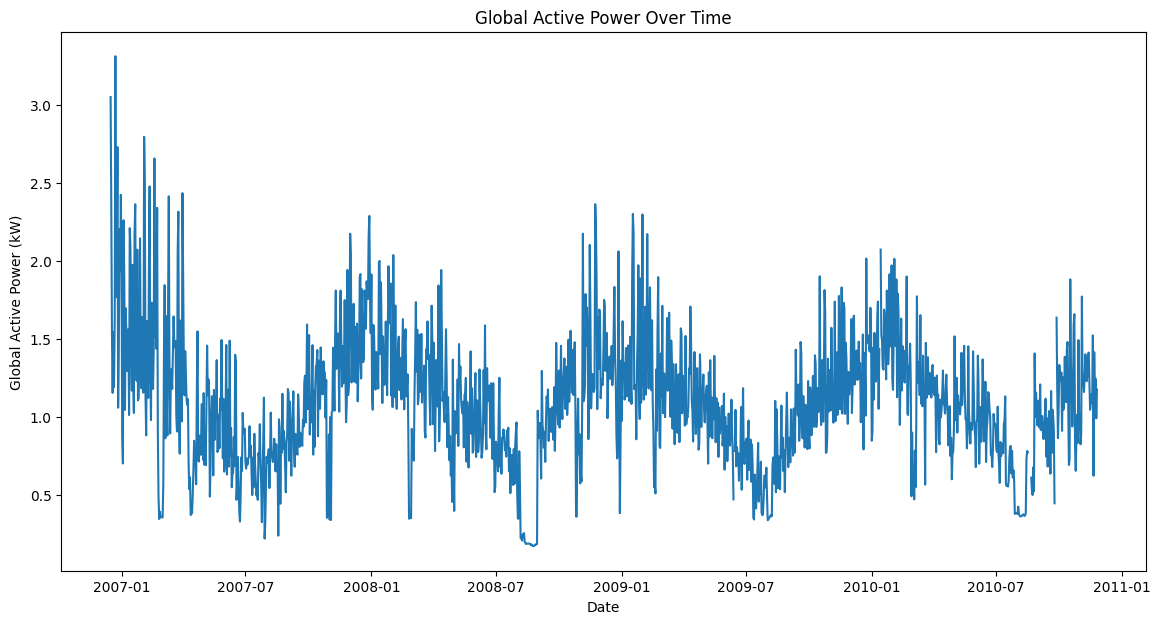

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.set_index('DateTime', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df['Global_active_power'].resample('D').mean())
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.show()


Clear seasonal pattern - higher in winter, lower in summer

Power typically ranges 0.5-2.0 kW, with peaks around 3.0 kW

Yearly cycles are consistent but with some variance in peak heights

Overall consumption appears relatively stable over the 4-year period

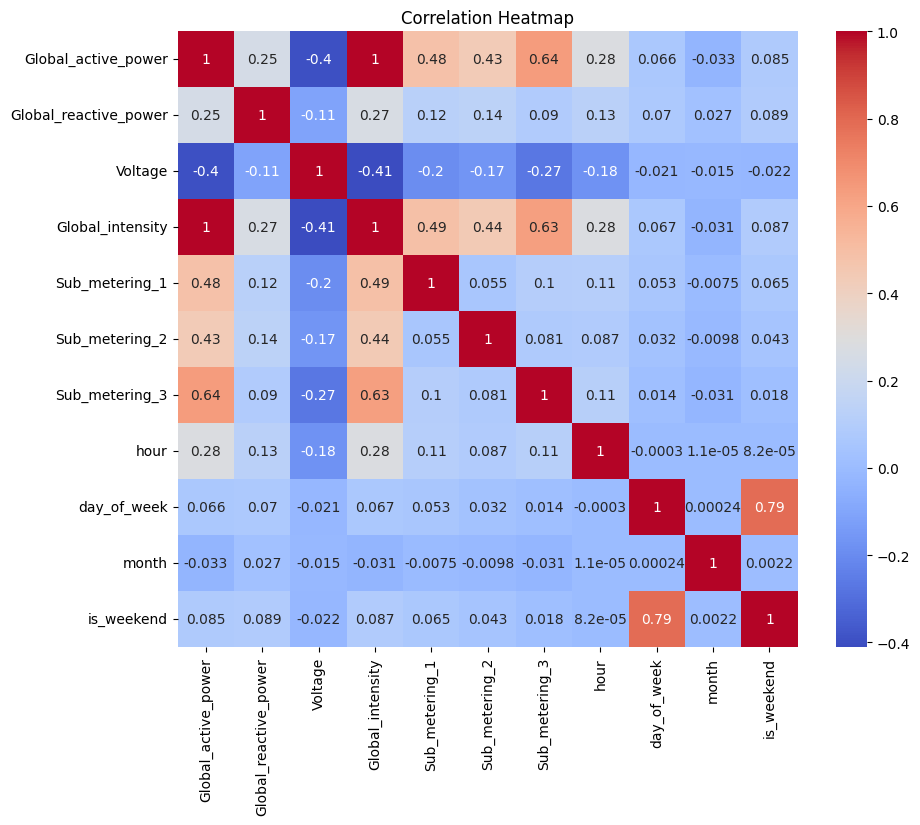

In [ ]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Global_active_power and Global_intensity are perfectly correlated (1.0)

Day_of_week and is_weekend are strongly correlated (0.79)

Voltage shows negative correlations with power consumption metrics

The three sub_metering systems are largely independent of each other

Time variables (month, hour) have minimal correlation with power usage, except for some weak daily patterns

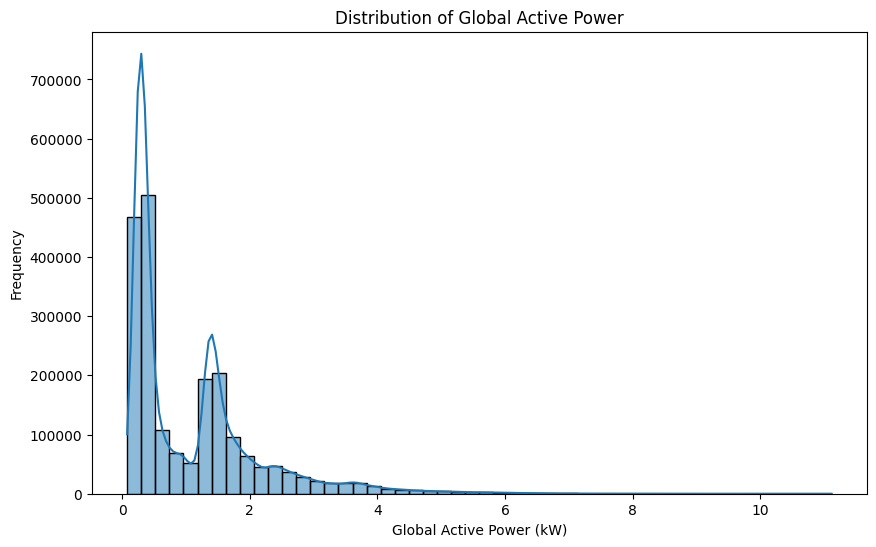

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.show()

Two main peaks: one around 0.3-0.4 kW (base load) and another at 1.5-2.0 kW (active usage)

Right-skewed distribution with rare high-power events up to 10 kW

Most power consumption falls between 0-4 kW

Clear distinction between standby and active power usage states

Very few instances of extreme power usage (>6 kW)

In [ ]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

#daily_avg_power = df['Global_active_power'].resample('D').mean()

# Rolling averages (e.g., 7-day rolling average)
df['rolling_avg_7d'] = df['Global_active_power'].rolling(window=7*24*60).mean()

df['non_measured_energy'] = (df['Global_active_power']*1000/60 -
                             df['Sub_metering_1'] -
                             df['Sub_metering_2'] -
                             df['Sub_metering_3'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# 2. Select relevant features for modeling
features = ['Global_reactive_power', 'Voltage', 'Sub_metering_1',
            'Sub_metering_2', 'Sub_metering_3', 'hour', 'day_of_week', 'year',
            'month', 'rolling_avg_7d', 'non_measured_energy']
X = df[features]
y = df['Global_active_power']

X = X.dropna()
y = y[X.index]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}



In [ ]:
results = {}
for name, model in models.items():
    rmse, mae, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R-squared (R²)": r2
    }

    if name == "Random Forest Regressor":
        y_pred_rf = model.predict(X_test)

print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nThe best-performing model is: {best_model_name}")


if best_model_name == "Random Forest Regressor":
    feature_importance = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance (Random Forest):")
    print(feature_importance_df)


Model Evaluation Results:

Linear Regression:
RMSE: 3.1859308160216236e-23
MAE: 5.644404752448372e-12
R-squared (R²): 1.0

Random Forest Regressor:
RMSE: 0.00023063063477188445
MAE: 0.0018495438173225058
R-squared (R²): 0.9997923337421064

Gradient Boosting Regressor:
RMSE: 0.001966358382972934
MAE: 0.027853839257304586
R-squared (R²): 0.9982294360527012

The best-performing model is: Linear Regression


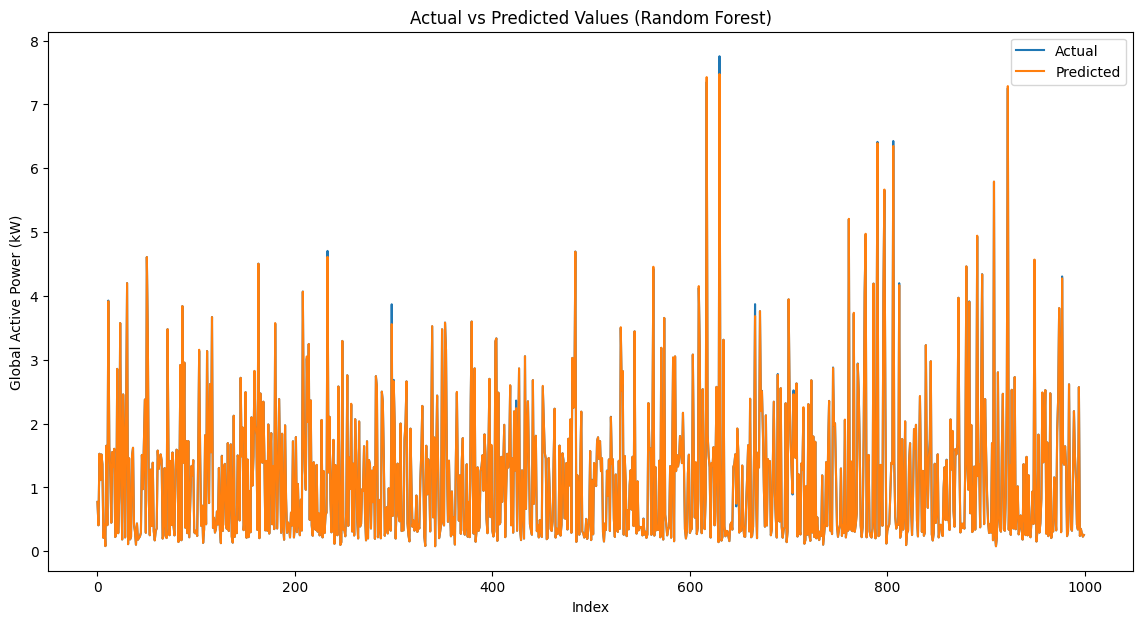

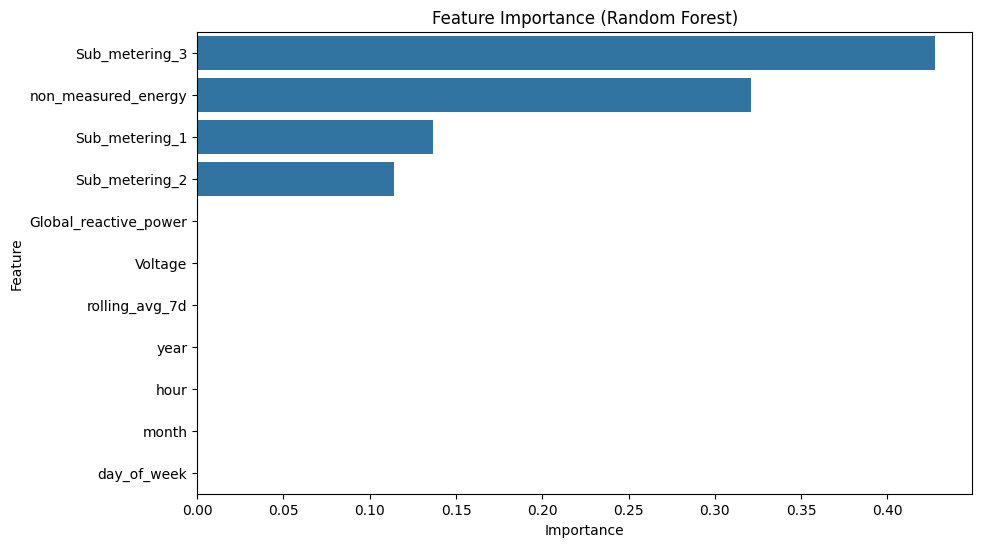

In [ ]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[:1000], label='Actual')
plt.plot(y_pred_rf[:1000], label='Predicted')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Feature Importance for Random Forest
rf = models["Random Forest Regressor"]
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()